# Taller modelos lineales
## Nancy Alejandra Vinazco Morales

# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [ ]:
income.shape

(32561, 15)

# Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



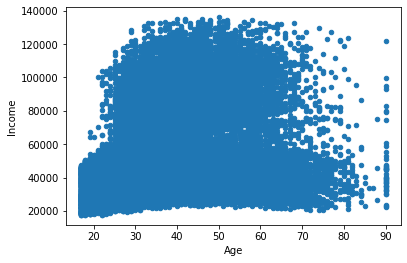

In [ ]:
income.plot(x='Age', y='Income', kind='scatter')

A partir del grafico de dispersión anterior, en donde miramos la relación de la edad frente al Ingreso, se puede decir que no se aprecia alguna correlación directa o indirecta entre las variables. 

**Normalización**

# Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

**Regresión Lineal**

In [ ]:
y = income["Income"].values
X = income["Age"].values

y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/y_std
X = (X - X_mean)/X_std


In [ ]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
print(X_)

[[ 1.          0.03067056]
 [ 1.          0.83710898]
 [ 1.         -0.04264203]
 ...
 [ 1.          1.42360965]
 [ 1.         -1.21564337]
 [ 1.          0.98373415]]


In [ ]:
# Initialize
linreg = LinearRegression(fit_intercept=False)
# Fit
linreg.fit(X_, y)
linreg.coef_

array([8.39066006e-17, 2.90408298e-01])

## $$ h_\beta(x) = \beta_0 + \beta_1x_1 $$

Para las variables estandarizadas:

- $h_\beta(x)$ - $Income$
- $\beta_0$ = 0
- $\beta_1$ = 0.2904083 para $Age$ (la primera variable)

Un aumento del 1 por ciento en la edad, el Ingreso aumenta en un **29,04** por ciento 


In [ ]:
yy = income["Income"].values
XX = income["Age"].values
nn_samples = XX.shape[0]
XX_ = np.c_[np.ones(nn_samples), XX]

linreg.fit(XX_, yy)
linreg.coef_


array([32538.08813087,   542.16765707])

Para las variables sin estandarizar: 

- $h_\beta(x)$ - $Income$
- $\beta_0$ = 0 (en este caso no se interpreta) 
- $\beta_1$ = $542.167$ para $Age$ (la primera variable)

En un aumento de una unidad en la edad, el Ingreso aumenta **542.167** dolares

In [ ]:
clf1 = LinearRegression()
clf2 = LinearRegression()
clf3 = LinearRegression()
clf4 = LinearRegression()

# Predicciones

**Predección del INGRESO cuando la EDAD es de 30**



In [ ]:
x = np.array([30])

In [ ]:
clf1.fit(income[['Age']], income['Income'])
clf1.predict(x.reshape(1, -1))

array([48803.11784304])

De acuerdo al modelo, cuando tenemos $Age$ = $30$  el ingreso sería de  $48803.12$ dolares

**Predección del INGRESO cuando la EDAD es de 40**

In [ ]:
x = np.array([40])

In [ ]:
clf2.fit(income[['Age']], income['Income'])
clf2.predict(x.reshape(1, -1))

array([54224.79441376])

De acuerdo al modelo, cuando tenemos $Age$ = $40$  el ingreso sería de  $54224.8$ dolares


# Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [ ]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


### Hipótesis:

* Previamente:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 $$

donde $x_1$ = Age

* Ahora:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
donde $x_2$ = $Age^2$

In [ ]:
X = income[['Age', 'Age2']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [ ]:
X_ = np.c_[np.ones(n_samples), X]

Ecuaciones OLS 

In [ ]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([ 4.00789036e-17,  1.67751068e+00, -1.41415206e+00])

# Predicciones

**Predección del INGRESO cuando la EDAD es de 30**



In [ ]:
x = np.array([30., 30.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        , -0.6291427 , -0.65698034]])

In [ ]:
def lr_h(beta,x):
    return np.dot(beta.T, x.T)

y_pred = lr_h(betas_ols, x_)
y_pred

array([-0.12632349])

In [ ]:
y_pred = y_pred * y_std + y_mean
y_pred

array([50238.96390027])

De acuerdo al modelo, cuando tenemos $Age$ = $30$ y $Age2$ = $30^2$ el ingreso sería de $50238.96$ dolares

Usando Sklearn

In [ ]:
clf1.fit(income[['Age', 'Age2']], income['Income'])
clf1.predict(x.reshape(1, -1))

array([50238.96390027])

**Predección del INGRESO cuando la EDAD es de 40**

In [ ]:
x = np.array([40., 40.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        ,  0.10398314, -0.06327166]])

In [ ]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([0.26390858])

In [ ]:
y_pred = y_pred * y_std + y_mean
y_pred

array([60176.27802692])

De acuerdo al modelo, cuando tenemos $Age$ = $40$ y $Age2$ = $40^2$  el ingreso sería de \$  $60176.29$

Usando Sklearn

In [ ]:
clf2.fit(income[['Age', 'Age2']], income['Income'])
clf2.predict(x.reshape(1, -1))

array([60176.27802692])

# Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


Para predecir la variable **Income** tendre en cuenta las variables **Hours per week** y **Capital Gain**, pues más adelante se vera que tanto se afecta la variable **Income** incrementando en una unidad o un 1% estas dos variables dejando los años 30 y 40.  

In [ ]:
X = income[['Age', 'Hours per week', 'Capital Gain']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676,   40.43745585, 1077.64884371]),
 array([  13.64022309,   12.34723908, 7385.17867695]))

In [ ]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.03542945,  0.1484529 ],
       [ 1.        ,  0.83710898, -2.22215312, -0.14592048],
       [ 1.        , -0.04264203, -0.03542945, -0.14592048],
       [ 1.        ,  1.05704673, -0.03542945, -0.14592048],
       [ 1.        , -0.77576787, -0.03542945, -0.14592048]])

In [ ]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([1.45524772e-16, 2.59484826e-01, 2.52411413e-01, 1.74687282e-01])

El modelo es el siguiente:
## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3$$

- $h_\beta(x)$ - **Income**
- $\beta_0$ $\thickapprox$ 0 
- $\beta_1$ = $0.2594$ para $x_1$ ($Age$ estandarizada)
- $\beta_2$ = $0.2524$ para $x_2$ ($Hours \hspace{3mm} per \hspace{3mm}week$  estandarizada)
- $\beta_3$ = $0.17468$ para $x_3$ ($Capital \hspace{3mm} Gain$  estandarizada)

Podemos ver que las tres variables aportan al incremento positivo de la variable respuesta $ Income$, si se incrementan en una unidad $Income$ también aumenta.  

**Prediccion del ingreso cuando *Age* es $30$, *Hours per week* son $40$ y *Capital Gain* es $2000$**


In [ ]:
x = np.array([30., 40.,2000.])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_


array([[ 1.        , -0.6291427 , -0.03542945,  0.12489219]])

In [ ]:
y_pred = lr_h(betas_ols, x_)
y_pred


array([-0.1503787])

In [ ]:
y_pred = y_pred * y_std + y_mean
y_pred

array([49626.39453341])

**Prediccion del ingreso cuando *Age* es $40$, *Hours 
per week* son $40$ y *Capital Gain* es $2000$**


In [ ]:
x = np.array([40., 40.,2000.])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_


array([[ 1.        ,  0.10398314, -0.03542945,  0.12489219]])

In [ ]:
y_pred = lr_h(betas_ols, x_)
y_pred


array([0.03985633])

In [ ]:
y_pred = y_pred * y_std + y_mean
y_pred

array([54470.75611018])

## Comparación de las predicciones segun las variables independientes tenidas en cuenta  

| Modelo (variable/s)           | Age = 30 | Age = 40|
|--------------------------------|----------|---------|
| Age                       | 48803.13 | 54224.8 |
| Age y Age2 |50238.9 |60176.3|
| Age, Hours = 40 & Capital = 2000|49626.4|54470.7|

- Se puede apreciar que teniendo en cuenta las variables **Age**, **Hours per week** y **Capital Gain** se predice un valor mayor de **Income** a que si solo se tuviera en cuenta la variable **Age**
- A mayor horas trabajadas, mayor capital ganado y mayor edad, mayor seran los ingresos.

#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [233]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [234]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.5

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn.



In [235]:
data['Churn'] = data['Churn?'].map({"False.":0, "True.":1}) 
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [236]:
f , t , v = data.Churn.value_counts()[0],data.Churn.value_counts()[1] , len(data)
p = f/v *100
q = t/v *100
print('El porcentaje de Churn = False (0) es de ', round(p,2) , '% ''\nEl porcentaje de Churn = True (1) es de ', round(q,2) , '% '  )

El porcentaje de Churn = False (0) es de  85.51 % 
El porcentaje de Churn = True (1) es de  14.49 % 


- Inicialmete vemos que la mayor parte de la variable Churn, al rededor del 85 % es False (0), es decir no abandono.
- Al rededor del 14 % clientes si abandonaron.  

# Ejercicio 4.6
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


Text(0, 0.5, 'Churn')

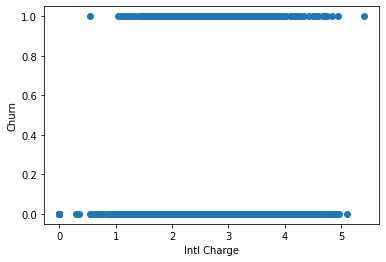

In [237]:
plt.scatter(data['Intl Charge'], data['Churn'])
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

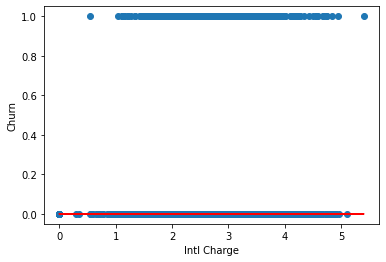

In [238]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Intl Charge']
X = data[feature_cols]
y = data.Churn
logreg.fit(X, y)
data['Churn_pred_class'] = logreg.predict(X)
# trazar las predicciones de la clase
plt.scatter(data['Intl Charge'], data['Churn'])
plt.plot(data['Intl Charge'], data.Churn_pred_class, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

In [239]:
# almacenar las probabilidades previstas de la clase 1
data['Churn_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'Churn')

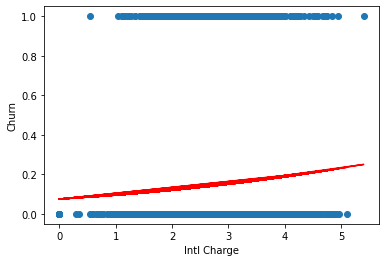

In [240]:
# trazar las probabilidades predichas
plt.scatter(data['Intl Charge'], data['Churn'])
plt.plot(data['Intl Charge'], data['Churn_pred_prob'], color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

- A partir del gráfico anterior se podría decir que las probabilidades recaen o pesan más para que la variable respuesta tome valores de 0 (False).

In [241]:
# examinar algunas predicciones de ejemplo
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.90480943 0.09519057]]
[[0.8796801 0.1203199]]
[[0.84902381 0.15097619]]


- Efectivamente, las probabilidades para que caiga en cero son muy altas, esto puede deberse a que como inicialmente se dijo, el modelo fue entrenado con un 85% de valores False = 0 en la variable respuesta Churn.

# Ejercicio 4.7

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [242]:
# calcula las probabilidades logarítmicas predichas para Intl Charge = 1 utilizando la ecuación
logodds = logreg.intercept_ + logreg.coef_[0] * 1
logodds

array([-2.25184351])

In [243]:
# convierte las odds logarítmicas en odds
odds = np.exp(logodds)
odds

array([0.1052051])

In [244]:
# Convertir los odds en probabilidad
prob = odds/(1 + odds)
prob
#la probabilidad de caer en esa categoria es de 0.1203

array([0.09519057])

In [245]:
# calcular la probabilidad predicha para Int Charge = 1 utilizando el método predict_proba
logreg.predict_proba([[2]])[:, 1]

array([0.1203199])

In [246]:
# examinar el coeficiente de al
feature_cols, logreg.coef_[0]

(['Intl Charge'], array([0.2624392]))

Un aumento de 1 unidad en "Intl Charge" se asocia con un aumento de 0.2624 unidades en las probabilidades logarítmicas de "Churn" de caer en 1 es decir de abandonar.

In [247]:
# examinar el intercepto
logreg.intercept_

array([-2.51428271])

Para un valor de "Intl Charge" de 0, el logaritmo de las posibilidades de "Churn" de abandono es de -2.5142.

# Ejercicio 4.8

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


**Variables**

- Day Mins 
- Int'l Plan
- Account Length



In [248]:
data['Intl Plan'] = data["Int'l Plan"].map({"no":0, "yes":1}) 
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn,Churn_pred_class,Churn_pred_prob,Intl Plan
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0,0,0.141159,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0,0,0.176062,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0,0,0.160993,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0,0,0.114342,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0,0,0.142116,1


Para la variable "Int'l Plan", 
- 0 no cuenta con plan internacional
- 1 Si cuenta con plan Internacional

**Ajuste del modelo**

In [249]:
logreg1 = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Day Mins',"Intl Plan", 'Account Length']
X = data[feature_cols]
y = data.Churn
logreg1.fit(X, y)
data['Churn1_pred_class'] = logreg1.predict(X)

In [250]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn,Churn_pred_class,Churn_pred_prob,Intl Plan,Churn1_pred_class
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0,0,0.141159,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0,0,0.176062,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0,0,0.160993,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0,0,0.114342,1,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0,0,0.142116,1,0


In [251]:
# almacenar las probabilidades previstas de la clase 1
data['Churn1_pred_prob'] = logreg1.predict_proba(X)[:, 1]

In [252]:
# examinar los coeficientes 
feature_cols, logreg1.coef_[0]

(['Day Mins', 'Intl Plan', 'Account Length'],
 array([1.11732954e-02, 1.73454741e+00, 6.26074281e-04]))

**Interpretación:**

- Para un aumento en una unidad de la variable *Day Mins* se asocia con un aumento de $0.0111733$ unidades en las probabilidades logarítmicas de la variable *Churn*
- Para un aumento en una unidad de la variable *Intl Plan* se asocia con un aumento de  $1.734547$ unidades en las probabilidades logarítmicas de la variable *Churn*
- Para un aumento en una unidad de la variable *Account Length* se asocia con un aumento de $0.0006260743$ unidades en las probabilidades logarítmicas de la variable *Churn*
- Todas son positivas, por lo tanto un aumento en ellas aumenta la posibilidad del abandono de la empresa por parte del cliente. 

In [253]:
logreg1.intercept_

array([-4.23745997])

**Interpretación:**

- Para un valor de 0 en las tres variables independientes, el algorítmo de las posibilidades de **Churn** es de -4.2374
